In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [8]:
from numpy.random import rand, randn

In [9]:
n, d, k = 100, 2, 2

In [24]:
np.random.seed(30)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([ 0.71445297,  0.99870548]), array([ 0.15374899,  0.2386241 ])]
[array([[ 0.64395242,  0.        ],
       [ 0.        ,  0.13705238]]), array([[ 0.64395242,  0.        ],
       [ 0.        ,  0.13705238]])]


Solution
===

In [20]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''
    res = np.zeros(len(X))
    for i in range(0, len(X)):
        value1 = np.log(1/(2*np.pi)/np.sqrt(np.linalg.det(sigma)))
        value2 = -0.5*np.dot(np.dot(X[i] - mean, np.linalg.inv(sigma)), X[i] - mean)
        res[i] = value1*value2
    return res

In [25]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

In [26]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0
 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0
 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0]


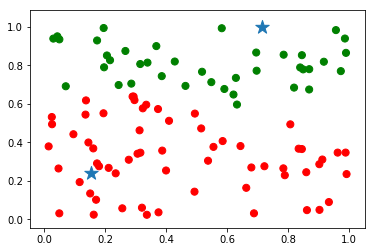

In [33]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=50)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)